# Aplicação do Perceptron Simples

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn import datasets
from sklearn import preprocessing
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

## Desenvolvimento do Algoritmo do Perceptron

In [2]:
# Implementação do algoritmo do Perceptron
class Perceptron:

    # Inicialização de parâmetros da rede
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    # Função de treinamento da rede
    def fit(self, X, y):
        n_samples, n_features = X.shape
        epoch_errors = np.zeros(self.n_iters)
        # 1) Inicializa-se os pesos e bias com 0s:
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Deixando o vetor y no padrão contendo apenas 0s e 1s.
        y_ = np.array([1 if i > 0 else 0 for i in y])
        # 2) Apresenta-se entradas a rede, de uma a uma: 
        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # 3) Calcula-se a saída da rede atual
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                # 4) Atualiza-se os pesos caso um erro acontecer
                error = (y_[idx] - y_predicted)
                update = self.lr * error
                self.weights += update * x_i
                self.bias += update
                epoch_errors[epoch] += abs(error)
        return epoch_errors

    # Função de aplicação do perceptron
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # Função degrau
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

## Aplicação na Base de Dados Iris

### Estudo Inicial dos Dados

In [3]:
iris = datasets.load_iris()
# Descrição do dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris.data
# setosa - 0, versicolor - 1, virginica - 2  
y = iris.target 
pd.DataFrame(np.column_stack((X, y)), columns=iris.feature_names + ["target"]).sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
126,6.2,2.8,4.8,1.8,2.0
121,5.6,2.8,4.9,2.0,2.0
2,4.7,3.2,1.3,0.2,0.0
44,5.1,3.8,1.9,0.4,0.0
40,5.0,3.5,1.3,0.3,0.0


Text(0.5, 1.0, 'Petal Width x Petal Length')

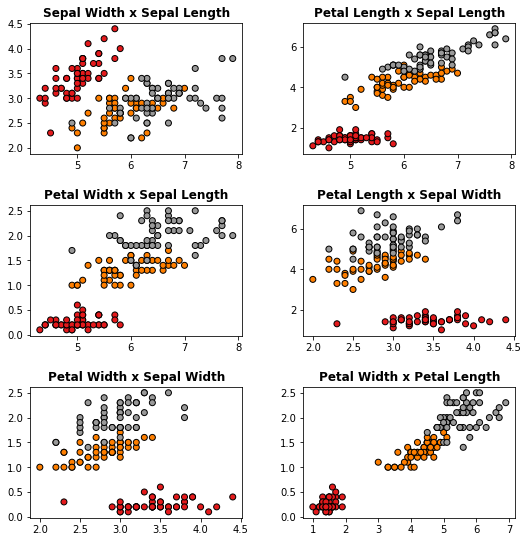

In [5]:
# Plotando as variaveis 2 a 2 para analisar a separabilidade:
fig, axs  = plt.subplots(3, 2, figsize=(8, 8))
fig.tight_layout(pad=3.0)

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
axs[0, 0].set_title('Sepal Width x Sepal Length',fontweight="bold")

axs[0, 1].scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k")
axs[0, 1].set_title('Petal Length x Sepal Length',fontweight="bold")

axs[1, 0].scatter(X[:, 0], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor="k")
axs[1, 0].set_title('Petal Width x Sepal Length', fontweight="bold")

axs[1, 1].scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k")
axs[1, 1].set_title('Petal Length x Sepal Width', fontweight="bold")

axs[2, 0].scatter(X[:, 1], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor="k")
axs[2, 0].set_title('Petal Width x Sepal Width', fontweight="bold")

axs[2, 1].scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor="k")
axs[2, 1].set_title('Petal Width x Petal Length',fontweight="bold")

### Definição do Problema: Setosa vs Não Setosa

In [6]:
# O problema agora possui apenas as classes y=0 e y=1
y[y>0] = 1
np.unique(y)

array([0, 1])

### Treinamento e Teste do Modelo

In [7]:
def train_test_model(X, y, epochs):
    # Separando os dados entre treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Treinamento do Perceptron
    perceptron = Perceptron(learning_rate=0.01, n_iters=epochs)
    epoch_errors = perceptron.fit(X_train, y_train)

    # Aplicação do modelo
    y_hat=perceptron.predict(X_test)
    y_hat_train=perceptron.predict(X_train)  

    # Cálculo das acurácias de treino e teste
    train_accuracy = accuracy_score(y_train, y_hat_train)   
    test_accuracy = accuracy_score(y_test, y_hat)

    print("********* Results Simple Perceptron **************")
    print("Acurácia de treinamento: " + '{:.2f}'.format(train_accuracy))
    print("Acurácia de teste: " + '{:.2f}'.format(test_accuracy))
    return y_hat, y_test, epoch_errors, perceptron

y_hat, y_test, epoch_errors, perceptron = train_test_model(X, y, 10)

********* Results Simple Perceptron **************
Acurácia de treinamento: 1.00
Acurácia de teste: 1.00


### Matriz de Confusão e Curva ROC

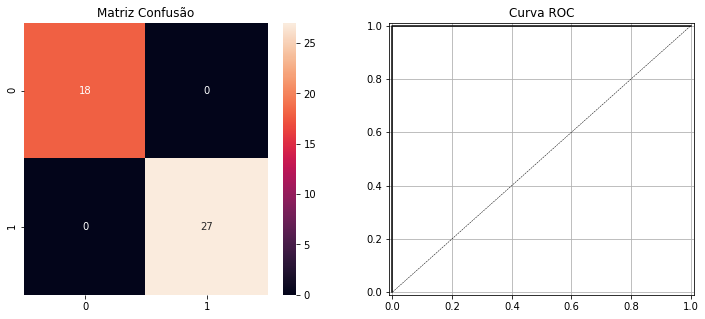

In [8]:
def plot_results(y_test, y_hat):
    df_confusion = confusion_matrix(y_test, y_hat)
    fig, ax = plt.subplots(1,2, figsize=(12,5))         # Sample figsize in inches
    sns.heatmap(df_confusion, annot=True, ax=ax[0], fmt='g')
    ax[0].set(title='Matriz Confusão')

    fpr, tpr, thr = roc_curve(y_test, y_hat)
    ax[1].plot(fpr, tpr, 'k-')
    ax[1].plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax[1].grid(True)
    ax[1].set(title='Curva ROC', xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    
plot_results(y_test, y_hat)

### Gráfico de Erros por Época

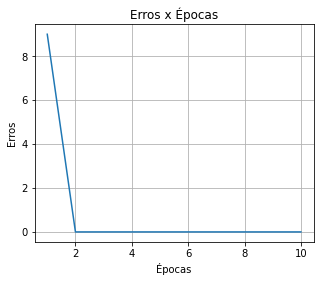

In [9]:
def plot_epoch_errors(epoch_errors):
    fig = plt.figure(figsize=(5,4))
    plt.plot(range(1, epoch_errors.shape[0] + 1), epoch_errors)
    plt.grid()
    plt.title("Erros x Épocas")
    plt.xlabel("Épocas")
    plt.ylabel("Erros")
    
plot_epoch_errors(epoch_errors)

## Aplicação na Base de Dados Iris Utilizando Apenas 3 Features 

********* Results Simple Perceptron **************
Acurácia de treinamento: 1.00
Acurácia de teste: 1.00


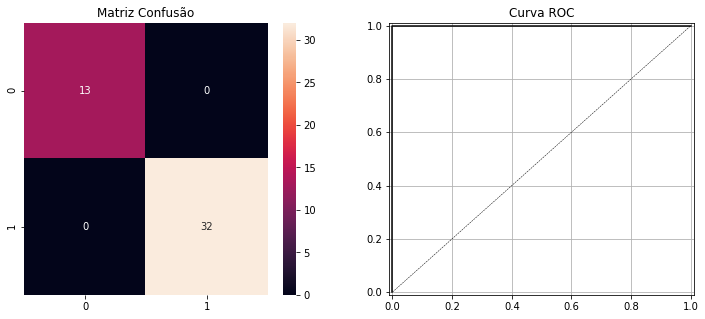

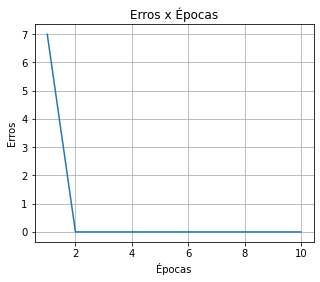

In [10]:
# Selecionando 3 features:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
y_hat, y_test, epoch_errors, perceptron = train_test_model(X_new, y, 10)
plot_results(y_test, y_hat)
plot_epoch_errors(epoch_errors)

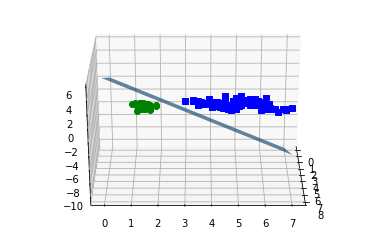

In [11]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

z = lambda x,y_: (-perceptron.bias - perceptron.weights[0]*x -perceptron.weights[1]*y_) / perceptron.weights[2]
tmp = np.linspace(0,7,30)
x,y_ = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_new[y==0,0], X_new[y==0,1], X_new[y==0,2],'og')
ax.plot3D(X_new[y==1,0], X_new[y==1,1], X_new[y==1,2],'sb')
ax.plot_surface(x, y_, z(x,y_))
ax.view_init(25, 0)
fig.tight_layout(pad=3.0)
plt.show()

## Aplicação na Base de Dados Iris Utilizando Apenas 2 Features

********* Results Simple Perceptron **************
Acurácia de treinamento: 1.00
Acurácia de teste: 1.00


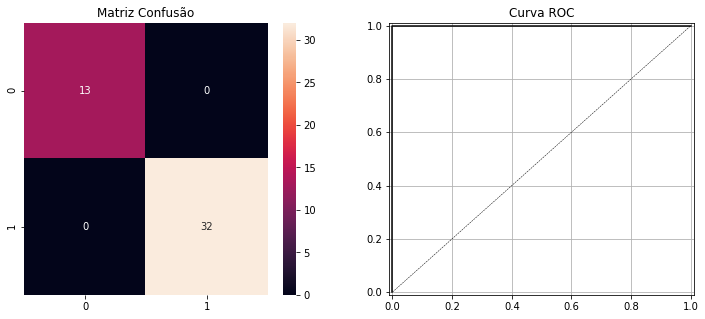

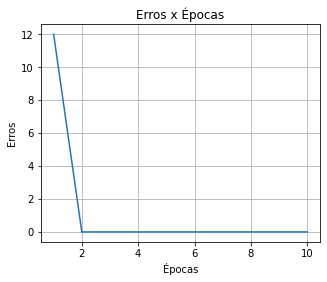

In [136]:
# Selecionando 2 features:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
y_hat, y_test, epoch_errors, perceptron = train_test_model(X_new, y, 10)
plot_results(y_test, y_hat)
plot_epoch_errors(epoch_errors)

In [155]:
def plot_decision_border(X, y, clf, fig):
    #fig = plt.figure()
    ax = fig.add_subplot(121)
    # decision surface for logistic regression on a binary classification dataset
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    #grid = normalizer.transform(grid)
    # make predictions for the grid
    yhat=(clf.predict(grid))
    yhat=np.array(yhat)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in [0, 1]:
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    # show the plot
    #plt.show()  

def plot_surface(X_, y_, clf, fig):
    #fig = plt.figure()
    min1, max1 = X_[:, 0].min()-1, X_[:, 0].max()+1
    min2, max2 = X_[:, 1].min()-1, X_[:, 1].max()+1
    ax = fig.add_subplot(122, projection='3d')
    # create grid to evaluate model
    x = np.linspace(min1, max1, 30)
    y = np.linspace(min2, max2, 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    print(xy.shape)
    #xy = normalizer.transform(xy)
    Z=clf.predict(xy)
    Z=np.array(Z).reshape(X.shape)
    # plot decision boundary and margins
    figure= ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='RdBu',edgecolor='none', alpha=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    cbar = fig.colorbar(figure, ax=ax, extend='both')
    cbar.minorticks_on()
    ax.view_init(30, -80)
    ax.scatter(X_[y_==0,0], X_[y_==0,1], 0, s=150, depthshade=False)
    ax.scatter(X_[y_==1,0], X_[y_==1,1], 1, s=150, depthshade=False)
    
    plt.show()



(900, 2)


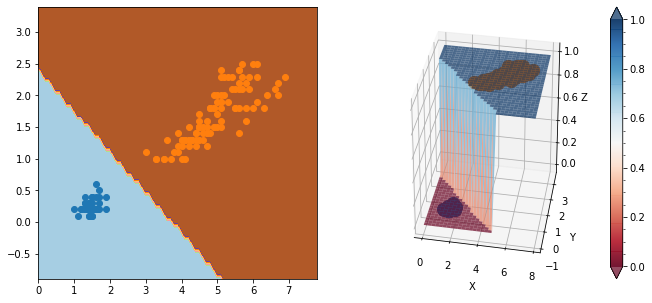

In [156]:
%matplotlib inline
fig = plt.figure(figsize=(11,5))
plot_decision_border(X_new, y, perceptron, fig)
plot_surface(X_new, y, perceptron, fig)